In [1]:
import dlib
import numpy as np
from skimage import io
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def face_landmarks(img):
    predictor_path = "shape_predictor_68_face_landmarks.dat"

    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(predictor_path)

    #img = io.imread("../examples/faces/new_normal_1.jpg")

    dets = detector(img)

    #output face landmark points inside rectangle
    #shape is points datatype
    #http://dlib.net/python/#dlib.point
    for k, d in enumerate(dets):
        shape = predictor(img, d)

    vec = np.empty([68, 2], dtype = int)
    for b in range(30,36):
        vec[b][0] = shape.part(b).x
        vec[b][1] = shape.part(b).y

    return vec

In [2]:
from scipy import stats
import scipy.signal

nose_cascade = cv2.CascadeClassifier('/Users/rangodrich/CT_specialization_project/haarcascade_mcs_nose.xml')

if nose_cascade.empty():
    raise IOError('Unable to load the nose cascade classifier xml file')

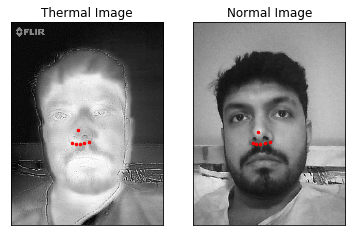

In [3]:
import cv2
import matplotlib.pyplot as plt

img_thermal = cv2.imread('../examples/faces/FLIR0008.jpg',0)
img_normal = cv2.imread('../examples/faces/new_normal_1.jpg',0)

vec = face_landmarks(img_normal)
nose_coord = vec[30:36]

thermal_nose_coord = []
for i in range(len(nose_coord)):
    if i == 0:
        thermal_nose_coord.append([nose_coord[i][0]+7, nose_coord[i][1]-5])
    else:
        thermal_nose_coord.append([nose_coord[i][0]+7, nose_coord[i][1]])
        
fig = plt.figure()
plt.subplot(121)
for i in range(len(thermal_nose_coord)):
    plt.plot(thermal_nose_coord[i][0], thermal_nose_coord[i][1], 'r.', markersize=5);

plt.imshow(img_thermal,cmap = 'gray')
plt.title('Thermal Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
for i in range(len(nose_coord)):
    plt.plot(nose_coord[i][0], nose_coord[i][1], 'r.', markersize=5);

plt.imshow(img_normal,cmap = 'gray')
plt.title('Normal Image'), plt.xticks([]), plt.yticks([])
plt.savefig('arpit_nose_landmarks.pdf')
plt.show()

In [49]:
cap_thermal = cv2.VideoCapture('/Users/rangodrich/CT_specialization_project/thermal/IMG_9743.mov')
cap_normal = cv2.VideoCapture('/Users/rangodrich/CT_specialization_project/normal/test90fps_gautum.mp4')
count=0
y_val=[]
while(cap_normal.isOpened() and cap_thermal.isOpened()):
    
    ret_thermal, frame_thermal = cap_thermal.read()
    ret_normal, frame_normal = cap_normal.read()
    
    gray_normal = cv2.cvtColor(frame_normal, cv2.COLOR_BGR2GRAY)
    nose_rects = nose_cascade.detectMultiScale(gray_normal, 1.3, 5)
    
    for (x,y,w,h) in nose_rects:
        #frame=cv2.rectangle(frame_normal, (x,y), (x+w,y+h), (0,255,0), 3)
        frame=cv2.rectangle(frame_thermal, (int(1.4*x),int(.9*y)), (x+int(2.5*w),y+int(1.2*h)), (0,255,0), 3)
        tmp1 = cv2.cvtColor(frame_thermal[int(.9*y):y+int(1.2*h),int(1.4*x):x+int(2.5*w)], cv2.COLOR_BGR2GRAY)
        blur_img = cv2.GaussianBlur(tmp1,(7,7),0)
        #histeq = cv2.equalizeHist(tmp1)
        
        y_val.append(np.average(blur_img))
        name = "/Users/rangodrich/CT_specialization_project/video_frames/frame%d.jpg"%count
        cv2.imwrite(name, blur_img)
        count += 1

TypeError: 'NoneType' object has no attribute '__getitem__'

In [102]:
import cv2

cap_thermal = cv2.VideoCapture('/Users/rangodrich/CT_specialization_project/thermal/FLIR0020.mov', 0)
cap_normal = cv2.VideoCapture('/Users/rangodrich/CT_specialization_project/normal/test90fps4.mp4', 0)
   
count = 0
intensity_val = []
while(cap_normal.isOpened() and cap_thermal.isOpened()):
    ret_normal, frame_normal = cap_normal.read()
    ret_thermal, frame_thermal = cap_thermal.read()
    
    if (count%3 == 0):
        vec = face_landmarks(frame_normal)
    nose_coord = vec[30:36]
    
    max_x = int(np.ceil(max(nose_coord[:,0])*1.63))
    max_y = int(np.ceil(max(nose_coord[:,1])*0.9847))
    min_x = int(np.floor(min(nose_coord[:,0])*1.54))
    min_y = int(np.floor(min(nose_coord[:,1])*0.9))
    
    #new_img = gray_normal[min_y:max_y+1, min_x:max_x+1]
    new_img = frame_thermal[min_y:max_y+1, min_x:max_x+1] 
    gray_thermal = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
    blur_img = cv2.GaussianBlur(gray_thermal,(7,7),0)
    #eq_img = cv2.equalizeHist(blur_img)
    
    intensity_val.append(np.mean(blur_img))
    name = "/Users/rangodrich/CT_specialization_project/video_frames/frame%d.jpg"%count
    cv2.imwrite(name, blur_img)

    count += 1

TypeError: 'NoneType' object has no attribute '__getitem__'

In [60]:
from scipy.signal import argrelextrema, savgol_filter
import scipy.fftpack

indices = min(270,len(y_val))

y_savgol = savgol_filter(y_val, 17, 3)

local_mins = argrelextrema(y_savgol, np.less)[0]
breaths_per_minute = np.multiply((len(local_mins)), ((540.)/len(y_savgol)))

In [97]:
a = frame_normal[2*len(frame_normal)/5:6*len(frame_normal)/11][:frame_normal.shape[1]/2]

TypeError: object of type 'NoneType' has no len()

In [98]:
frame_normal

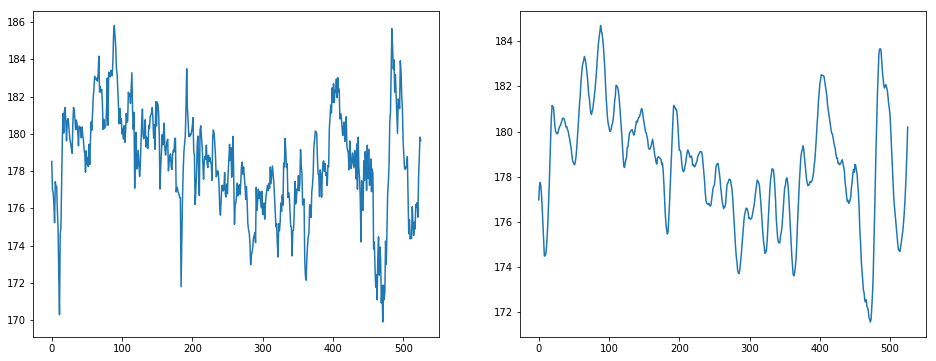

Your breathing rate is 40.0 breaths per minute


In [61]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(y_val)
plt.subplot(122)
plt.plot(y_intensity

plt.savefig('intensity_diff_over_frame_count.pdf')
plt.show()

print("Your breathing rate is %.1f breaths per minute" %breaths_per_minute)

In [62]:
local_mins

array([  8,  26,  39,  51,  75, 101, 122, 135, 140, 158, 168, 175, 183,
       206, 216, 219, 222, 241, 244, 263, 265, 285, 299, 301, 322, 342,
       363, 383, 388, 403, 426, 428, 439, 441, 449, 465, 472, 492, 514])

In [40]:
import cv2

cap_thermal = cv2.VideoCapture('/Users/rangodrich/CT_specialization_project/thermal/FLIR0020.mov', 0)
cap_normal = cv2.VideoCapture('/Users/rangodrich/CT_specialization_project/normal/test90fps4.mp4', 0)
   
intensity_val = []
images = []
count = 0
vec = 0

while(cap_normal.isOpened() and cap_thermal.isOpened()):
    ret_normal, frame_normal = cap_normal.read()
    ret_thermal, frame_thermal = cap_thermal.read()

    if (count%3 == 0):
        vec = face_landmarks(frame_normal)
        
    nose_coord = vec[30:36]
    
    max_x = max(nose_coord[:,0])+95
    max_y = max(nose_coord[:,1])-5
    min_x = min(nose_coord[:,0])+50
    min_y = min(nose_coord[:,1])-25

    new_img = frame_thermal[min_y:max_y+1, min_x:max_x+1] 
    gray_thermal = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
    
    blur_img = cv2.GaussianBlur(gray_thermal,(7,7),0)
    #eq_img = cv2.equalizeHist(blur_img)
    
    if count - 1 < 0:
        intensity_val.append(0.)
    else:
        intensity_val.append(np.mean(blur_img)-np.mean(images[count-1]))
    images.append(blur_img)
    count += 1

TypeError: 'NoneType' object has no attribute '__getitem__'

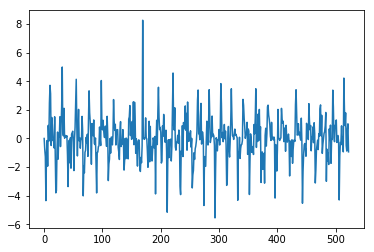

In [41]:
import time
t = time.time()
plt.figure()
plt.plot(np.array(intensity_val))
plt.show()
elapsed = time.time() - t

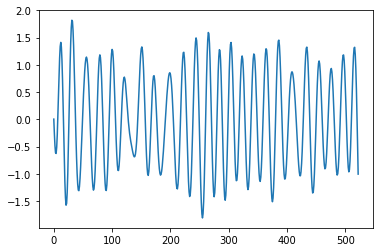

In [42]:
import scipy.signal as signal
fourier_t = np.fft.fft(intensity_val)
B, A = signal.butter(8, 0.125, btype='lowpass')
a = signal.filtfilt(B, A, intensity_val)
final = np.fft.ifft(a)

plt.plot(a)
plt.show()

In [ ]:
import cv2

cap_thermal = cv2.VideoCapture('/Users/rangodrich/CT_specialization_project/thermal/FLIR0020.mov', 0)
cap_normal = cv2.VideoCapture('/Users/rangodrich/CT_specialization_project/normal/test90fps4.mp4', 0)
   
count = 0
intensity_val = []
while(cap_normal.isOpened() and cap_thermal.isOpened()):
    ret_normal, frame_normal = cap_normal.read()
    ret_thermal, frame_thermal = cap_thermal.read()
    
    vec = face_landmarks(frame_normal)
    nose_coord = vec[30:36]
    
    max_x = max(nose_coord[:,0])+95
    max_y = max(nose_coord[:,1])-5
    min_x = min(nose_coord[:,0])+50
    min_y = min(nose_coord[:,1])-25

    #new_img = gray_normal[min_y:max_y+1, min_x:max_x+1]
    new_img = cv2.convexHull()
    gray_thermal = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
    blur_img = cv2.GaussianBlur(gray_thermal,(7,7),0)
    #eq_img = cv2.equalizeHist(blur_img)
    
    intensity_val.append(np.mean(blur_img))
    name = "/Users/rangodrich/CT_specialization_project/video_frames/frame%d.jpg"%count
    cv2.imwrite(name, blur_img)
    count += 1